## Resampling 

1) Involves changing the frequency of your time series observations.

2) Two types of resampling are:

Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.

Downsampling: Where you decrease the frequency of the samples, such as from days to months.

For example, you may have daily data and want to predict a monthly problem. You could use the daily data directly or you could downsample it to monthly data and develop your model.

##### Something to keep in mind is that Dan applies much more force with his left arm than his right (due to an old injury I think) which is clearly visible in the double poling data.

## Smoothing

#### https://www.displayr.com/smoothing-time-series-data/

The aim of smoothing is to remove “irregular” noise and cyclical components of the time series. It aims to provide a more accurate prediction of the long term trend. If long term trend is what you want to forecast, then smoothing techniques are generally quite helpful.

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset.

Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.


In [1]:
# import statements

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import Series

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, BatchNormalization

from sklearn.model_selection import train_test_split
from random import shuffle

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE


/Users/nickeylawrence/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read the Gear2 data
Gear2Files = ['./Gear2/segment2.csv', './Gear2/segment3.csv','./Gear2/segment4.csv',
              './Gear2/segment5.csv','./Gear2/segment6.csv']

X_Gear2=[0] * len(Gear2Files)
Y_Gear2=[0] * len(Gear2Files)
for index,file in enumerate(Gear2Files):
    X_Gear2[index] = pd.read_csv(file);
    Y_Gear2[index] = pd.DataFrame(data= np.full((X_Gear2[index].shape[0],1), 2));
    X_Gear2[index] = X_Gear2[index].assign(Gear=Y_Gear2[index].values);

# Read the Gear3 data
Gear3Files = ['./Gear3/segment1.csv', './Gear3/segment2.csv','./Gear3/segment3.csv',
              './Gear3/segment4.csv','./Gear3/segment5.csv', './Gear3/segment6.csv']

X_Gear3=[0] * len(Gear3Files)
Y_Gear3=[0] * len(Gear3Files)
for index,file in enumerate(Gear3Files):
    X_Gear3[index] = pd.read_csv(file);
    Y_Gear3[index] = pd.DataFrame(data= np.full((X_Gear3[index].shape[0],1), 3));
    X_Gear3[index] = X_Gear3[index].assign(Gear=Y_Gear3[index].values);

# Read the Gear4 data
Gear4Files = ['./Gear4/segment2.csv','./Gear4/segment3.csv','./Gear4/segment4.csv',
              './Gear4/segment5.csv', './Gear4/segment6a.csv','./Gear4/segment6b.csv']

X_Gear4=[0] * len(Gear4Files)
Y_Gear4=[0] * len(Gear4Files)
for index,file in enumerate(Gear4Files):
    X_Gear4[index] = pd.read_csv(file);
    Y_Gear4[index] = pd.DataFrame(data= np.full((X_Gear4[index].shape[0],1), 4));
    X_Gear4[index] = X_Gear4[index].assign(Gear=Y_Gear4[index].values);

# Read the Gear 5 data
Gear5Files = ['./Double/segment1.csv','./Double/segment2.csv','./Double/segment3.csv',
              './Double/segment4.csv', './Double/segment5.csv','./Double/segment7.csv']

X_Gear5=[0] * len(Gear5Files)
Y_Gear5=[0] * len(Gear5Files)
for index,file in enumerate(Gear5Files):
    X_Gear5[index] = pd.read_csv(file);
    Y_Gear5[index] = pd.DataFrame(data= np.full((X_Gear5[index].shape[0],1), 5));
    X_Gear5[index] = X_Gear5[index].assign(Gear=Y_Gear5[index].values);

In [3]:
# Implement moving average for a window size of 3, and split the segments such that each has 750 time-steps

limit = 750
features = list(X_Gear2[0].columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

XGear=[]
for index in range(len(X_Gear2)):
    dataG2 = X_Gear2[index];
    x = dataG2[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear2[index][scaledFeatures] = rolling_mean;
    dataG2 = X_Gear2[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG2)/limit);
    XGear += [dataG2[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear3)):
    dataG3 = X_Gear3[index];
    x = dataG3[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear3[index][scaledFeatures] = rolling_mean;
    dataG3 = X_Gear3[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG3)/limit);
    XGear += [dataG3[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear4)):
    dataG4 = X_Gear4[index];
    x = dataG4[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear4[index][scaledFeatures] = rolling_mean;
    dataG4 = X_Gear4[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG4)/limit);
    XGear += [dataG4[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
for index in range(len(X_Gear5)):
    dataG5 = X_Gear5[index];
    x = dataG5[scaledFeatures];
    rolling = x.rolling(window=3);
    rolling_mean = rolling.mean();
    X_Gear5[index][scaledFeatures] = rolling_mean;
    dataG5 = X_Gear5[index].iloc[2:, :];
    gearRange = math.ceil(len(dataG5)/limit);
    XGear += [dataG5[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
print(XGear)

[         t          fL        thL       w1L       w2L       w3L       a1L  \
2     0.04    0.133333  51.800000  0.201333  0.234000 -0.023000  3.156667   
3     0.06    0.166667  51.966667  0.198000  0.212333 -0.050000  3.296667   
4     0.08    0.166667  52.100000  0.171333  0.221667 -0.070667  3.226667   
5     0.10    0.200000  52.166667  0.130333  0.215000 -0.091000  3.030000   
6     0.12    0.200000  52.233333  0.083000  0.165333 -0.117000  2.786667   
7     0.14    0.200000  52.233333  0.024667  0.120333 -0.150333  2.646667   
8     0.16    0.200000  52.133333 -0.049333  0.087000 -0.185000  2.660000   
9     0.18    0.200000  51.900000 -0.139000  0.030000 -0.219667  2.873333   
10    0.20    0.200000  51.566667 -0.229000 -0.044333 -0.241667  3.260000   
11    0.22    0.166667  51.166667 -0.318000 -0.086333 -0.251667  3.596667   
12    0.24    0.166667  50.666667 -0.399667 -0.093667 -0.252000  3.626667   
13    0.26    0.166667  50.066667 -0.464333 -0.164667 -0.248667  3.366667  

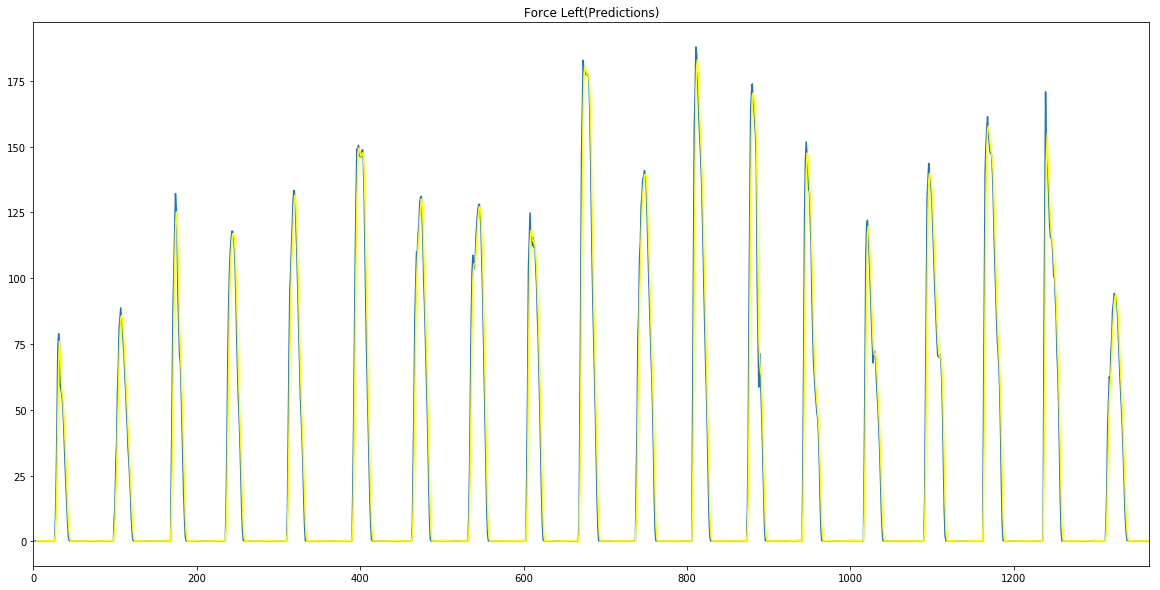

In [7]:
# Sample data after rolling

# features = list(X_Gear2[0].columns);
# scaledFeatures = [item for item in features if item not in ['t','Gear']]

# X2_Gear2_New = pd.DataFrame(X_Gear2[0][scaledFeatures])

# rolling = X2_Gear2_New.rolling(window=3)
# rolling_mean = rolling.mean()

# X2_Gear2_New['fL'].plot()
# rolling_mean['fL'].plot(color='yellow')
# plt.show()

In [4]:
X = XGear[:] # Copy words
shuffle(X) 

In [5]:
X = pd.concat(X);

In [6]:
data = pd.DataFrame(X);

data.reset_index(inplace = True, drop = True)
for i in range(len(data)):
    data.loc[i,'t'] = i*0.02

In [7]:
# Normalisation
# Feature normalization
# Normalize Time Series Data
# Source : https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

# Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
# useful when your time series data has input values with differing scales.
features = list(data.columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

for i in range(len(scaledFeatures)):
    feature = scaledFeatures[i];
    print('Scaling feature : ', scaledFeatures[i])
    values = X[feature].values.reshape(-1,1);
    values = values.astype('float32');
    scaler = MinMaxScaler(feature_range = (0,1));
    scaled_f = scaler.fit_transform(values);
    X[feature] = scaled_f;

Scaling feature :  fL
Scaling feature :  thL
Scaling feature :  w1L
Scaling feature :  w2L
Scaling feature :  w3L
Scaling feature :  a1L
Scaling feature :  a2L
Scaling feature :  a3L
Scaling feature :  fR
Scaling feature :  thR
Scaling feature :  w1R
Scaling feature :  w2R
Scaling feature :  w3R
Scaling feature :  a1R
Scaling feature :  a2R
Scaling feature :  a3R
Scaling feature :  x
Scaling feature :  y
Scaling feature :  v
Scaling feature :  vdir


In [8]:
# Create one-hot Y vectors
features.remove('Gear')
X = data[features]
Y = data['Gear']
# Create one-hot Y vectors
Y_onehot = pd.get_dummies(Y).values;

In [9]:
X = np.array(X)
Y = np.array(Y_onehot)

In [10]:
timesteps = 1
XNew = X.reshape(X.shape[0],timesteps,21)
YNew = Y.reshape(Y.shape[0],timesteps,4)

trainX, testX, trainY, testY = train_test_split(XNew, YNew, test_size=0.2);

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2);

In [11]:
# design and fit our LSTM network

model = Sequential();
model.add(LSTM(64, return_sequences = True, input_shape = (timesteps, 20)));
model.add(Dense(4, activation = 'softmax'));
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
history = model.fit(trainX[:,:,1:], trainY, epochs=200, batch_size=100, validation_data=(valX[:,:,1:],valY))


Train on 16578 samples, validate on 4145 samples
Epoch 1/200
16578/16578 [==============================] - 7s 441us/step - loss: 1.2051 - categorical_accuracy: 0.4752 - val_loss: 0.9153 - val_categorical_accuracy: 0.6589
Epoch 2/200
16578/16578 [==============================] - 6s 348us/step - loss: 0.7794 - categorical_accuracy: 0.6676 - val_loss: 0.7114 - val_categorical_accuracy: 0.6902
Epoch 3/200
16578/16578 [==============================] - 6s 347us/step - loss: 0.6852 - categorical_accuracy: 0.6836 - val_loss: 0.6747 - val_categorical_accuracy: 0.6905
Epoch 4/200
16578/16578 [==============================] - 6s 345us/step - loss: 0.6538 - categorical_accuracy: 0.6906 - val_loss: 0.6450 - val_categorical_accuracy: 0.7052
Epoch 5/200
16578/16578 [==============================] - 6s 373us/step - loss: 0.6349 - categorical_accuracy: 0.7029 - val_loss: 0.6292 - val_categorical_accuracy: 0.6963
Epoch 6/200
16578/16578 [==============================] - 7s 394us/step - loss: 0.623

16578/16578 [==============================] - 5s 296us/step - loss: 0.4396 - categorical_accuracy: 0.8124 - val_loss: 0.4468 - val_categorical_accuracy: 0.8203
Epoch 47/200
16578/16578 [==============================] - 5s 291us/step - loss: 0.4357 - categorical_accuracy: 0.8153 - val_loss: 0.4434 - val_categorical_accuracy: 0.8253
Epoch 48/200
16578/16578 [==============================] - 5s 294us/step - loss: 0.4338 - categorical_accuracy: 0.8150 - val_loss: 0.4419 - val_categorical_accuracy: 0.8205
Epoch 49/200
16578/16578 [==============================] - 5s 297us/step - loss: 0.4319 - categorical_accuracy: 0.8161 - val_loss: 0.4380 - val_categorical_accuracy: 0.8306
Epoch 50/200
16578/16578 [==============================] - 5s 286us/step - loss: 0.4280 - categorical_accuracy: 0.8201 - val_loss: 0.4328 - val_categorical_accuracy: 0.8251
Epoch 51/200
16578/16578 [==============================] - 5s 292us/step - loss: 0.4234 - categorical_accuracy: 0.8230 - val_loss: 0.4334 - va

16578/16578 [==============================] - 6s 374us/step - loss: 0.3164 - categorical_accuracy: 0.8651 - val_loss: 0.3175 - val_categorical_accuracy: 0.8695
Epoch 93/200
16578/16578 [==============================] - 6s 369us/step - loss: 0.3108 - categorical_accuracy: 0.8698 - val_loss: 0.3341 - val_categorical_accuracy: 0.8603
Epoch 94/200
16578/16578 [==============================] - 6s 365us/step - loss: 0.3138 - categorical_accuracy: 0.8675 - val_loss: 0.3173 - val_categorical_accuracy: 0.8656
Epoch 95/200
16578/16578 [==============================] - 6s 352us/step - loss: 0.3090 - categorical_accuracy: 0.8713 - val_loss: 0.3134 - val_categorical_accuracy: 0.8743
Epoch 96/200
16578/16578 [==============================] - 7s 418us/step - loss: 0.3071 - categorical_accuracy: 0.8707 - val_loss: 0.3125 - val_categorical_accuracy: 0.8678
Epoch 97/200
16578/16578 [==============================] - 7s 397us/step - loss: 0.3054 - categorical_accuracy: 0.8711 - val_loss: 0.3081 - va

Epoch 139/200
16578/16578 [==============================] - 8s 497us/step - loss: 0.2383 - categorical_accuracy: 0.9024 - val_loss: 0.2511 - val_categorical_accuracy: 0.8972
Epoch 140/200
16578/16578 [==============================] - 8s 491us/step - loss: 0.2386 - categorical_accuracy: 0.9029 - val_loss: 0.2441 - val_categorical_accuracy: 0.9016
Epoch 141/200
16578/16578 [==============================] - 10s 589us/step - loss: 0.2365 - categorical_accuracy: 0.9018 - val_loss: 0.2464 - val_categorical_accuracy: 0.8979
Epoch 142/200
16578/16578 [==============================] - 10s 597us/step - loss: 0.2360 - categorical_accuracy: 0.9020 - val_loss: 0.2430 - val_categorical_accuracy: 0.8996
Epoch 143/200
16578/16578 [==============================] - 9s 573us/step - loss: 0.2339 - categorical_accuracy: 0.9046 - val_loss: 0.2460 - val_categorical_accuracy: 0.9016
Epoch 144/200
16578/16578 [==============================] - 9s 570us/step - loss: 0.2341 - categorical_accuracy: 0.9034 - 

16578/16578 [==============================] - 10s 582us/step - loss: 0.1937 - categorical_accuracy: 0.9226 - val_loss: 0.2025 - val_categorical_accuracy: 0.9185
Epoch 186/200
16578/16578 [==============================] - 7s 420us/step - loss: 0.1945 - categorical_accuracy: 0.9218 - val_loss: 0.2055 - val_categorical_accuracy: 0.9194
Epoch 187/200
16578/16578 [==============================] - 7s 419us/step - loss: 0.1918 - categorical_accuracy: 0.9230 - val_loss: 0.1993 - val_categorical_accuracy: 0.9206
Epoch 188/200
16578/16578 [==============================] - 9s 554us/step - loss: 0.1912 - categorical_accuracy: 0.9227 - val_loss: 0.1970 - val_categorical_accuracy: 0.9228
Epoch 189/200
16578/16578 [==============================] - 7s 433us/step - loss: 0.1905 - categorical_accuracy: 0.9248 - val_loss: 0.2022 - val_categorical_accuracy: 0.9185
Epoch 190/200
16578/16578 [==============================] - 10s 627us/step - loss: 0.1890 - categorical_accuracy: 0.9238 - val_loss: 0.19

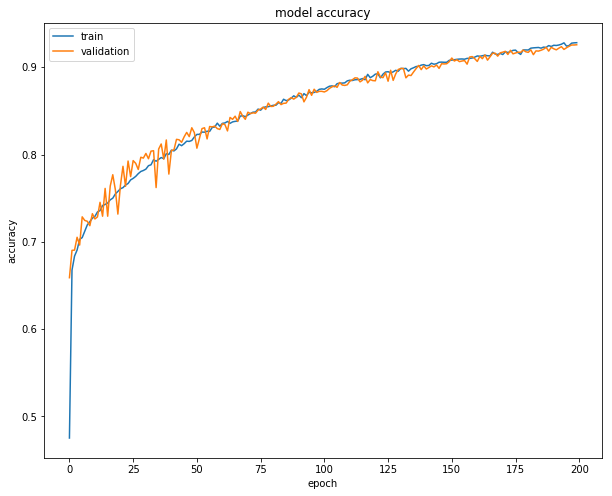

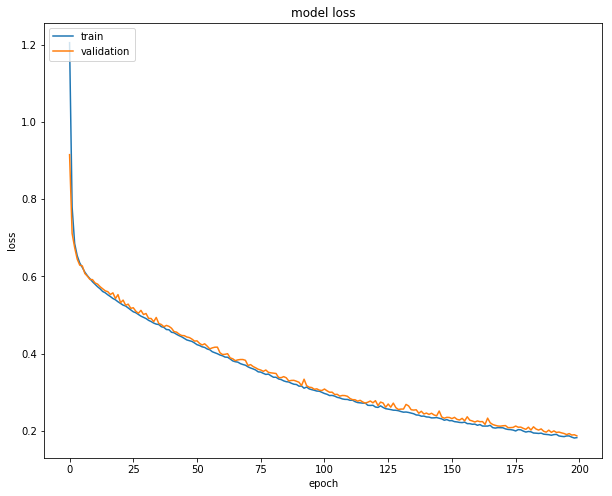

In [13]:
# summarize history for accuracy
plt.figure(0,figsize=(10, 8))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(0,figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
# Evaluate
predictions = model.predict_classes(testX[:,:,1:])

In [15]:
scores = model.evaluate(testX[:,:,1:], testY, verbose=2)
print(scores)

[0.18523609191409365, 0.925883034163289]


In [16]:
timeTest = np.array(testX[:,:,0])
forceLeftTest = np.array(testX[:,:,1])
forceRightTest = np.array(testX[:,:,9])
predTest = np.array(predictions+2)
realTest = np.array(np.argmax(testY, axis=2)+2)
result = np.concatenate((timeTest,forceLeftTest, forceRightTest, predTest, realTest), axis=1)

In [17]:
ind=np.argsort(result[:,0])
result2 = result[ind]

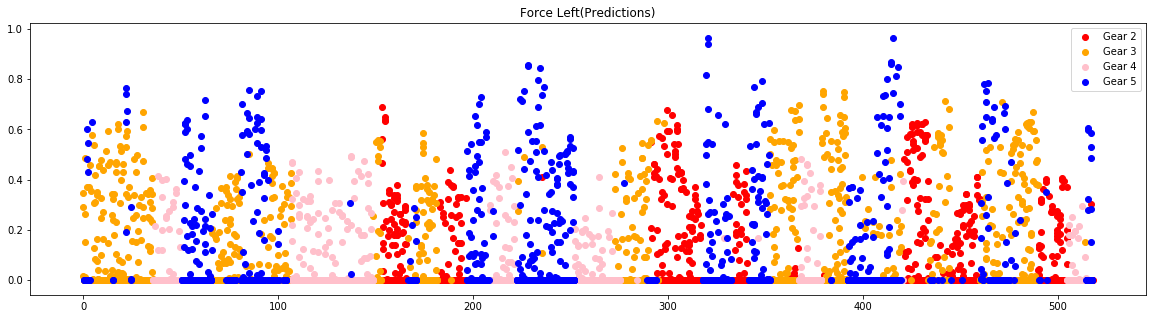

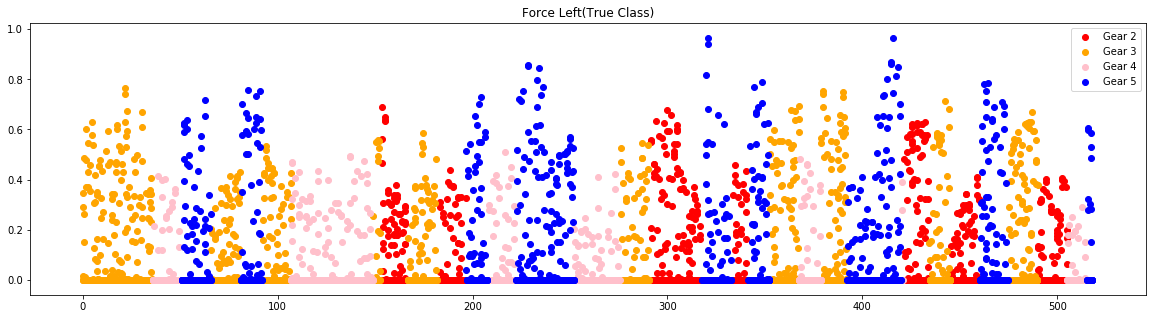

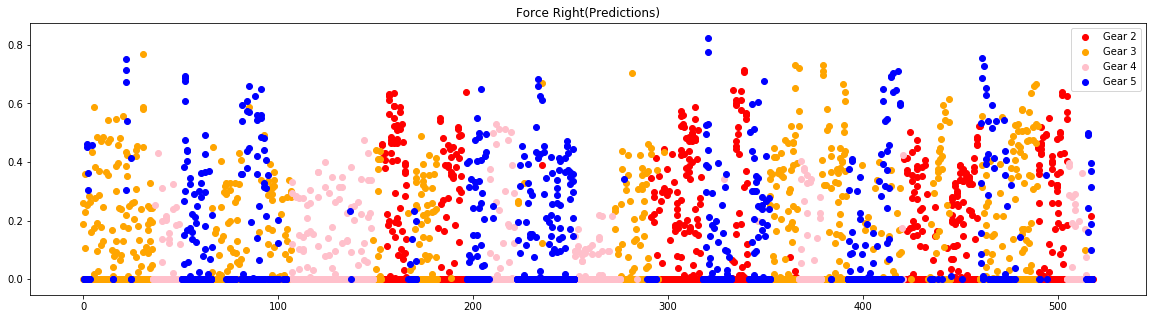

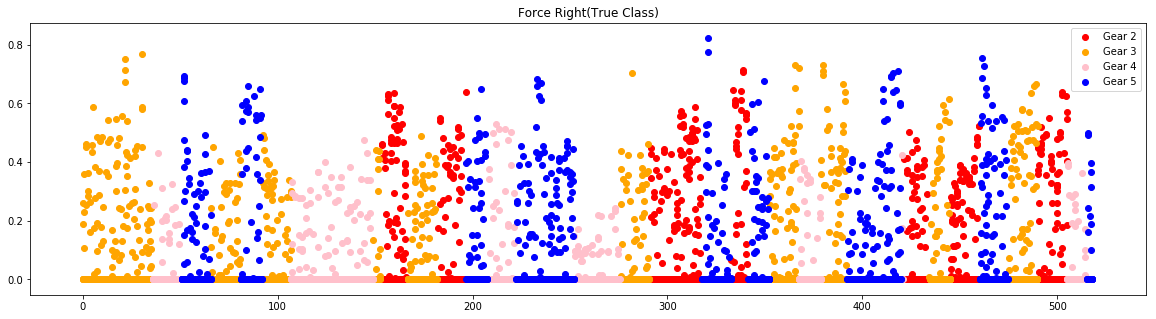

In [28]:
plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Left(Predictions)')
for i in range(2,6):
    classResult = result[result[:,3]==i]
    plt.scatter(classResult[:,0],classResult[:,1],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Left(True Class)')
for i in range(2,6):
    classRealResult = result[result[:,4]==i]
    plt.scatter(classRealResult[:,0],classRealResult[:,1],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
plt.title('Force Right(Predictions)')
for i in range(2,6):
    classResult = result[result[:,3]==i]
    plt.scatter(classResult[:,0],classResult[:,2],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()

plt.figure(0,figsize=(20, 5))
color = {2:'red',3:'orange',4:'pink', 5:'blue'}
plt.title('Force Right(True Class)')
for i in range(2,6):
    classRealResult = result[result[:,4]==i]
    plt.scatter(classRealResult[:,0],classRealResult[:,2],c =color[i],label='Gear ' + str(i))
    plt.legend()
plt.show()


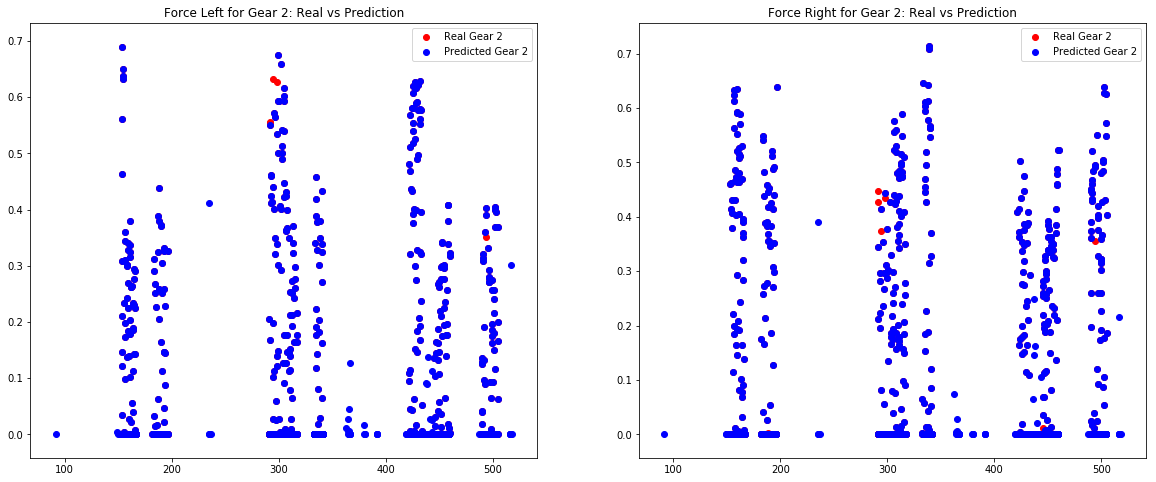

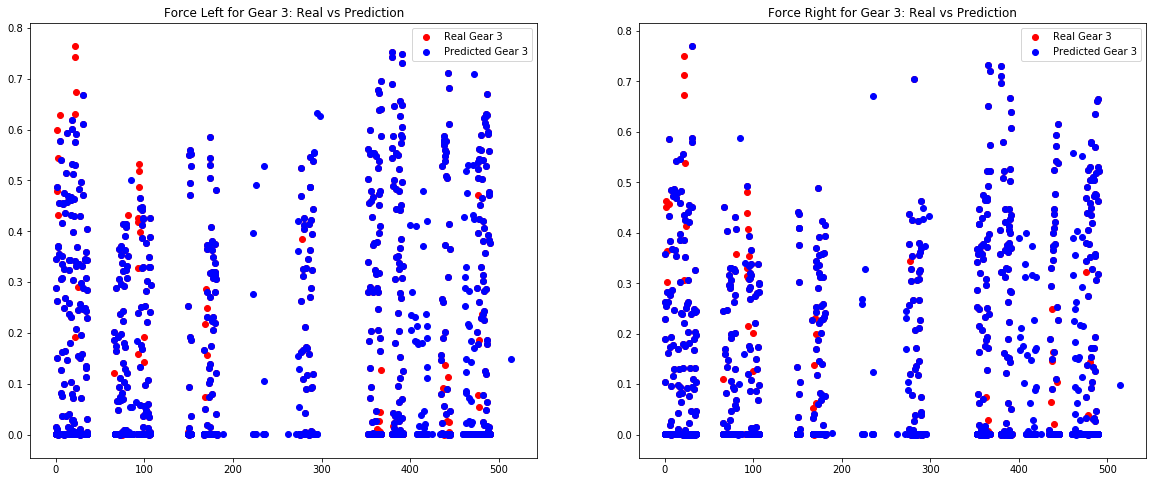

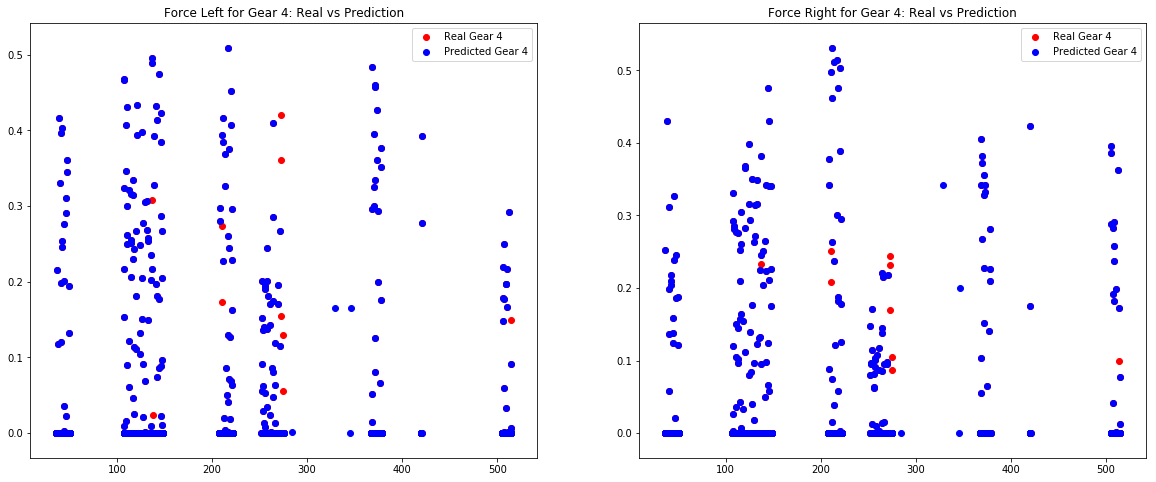

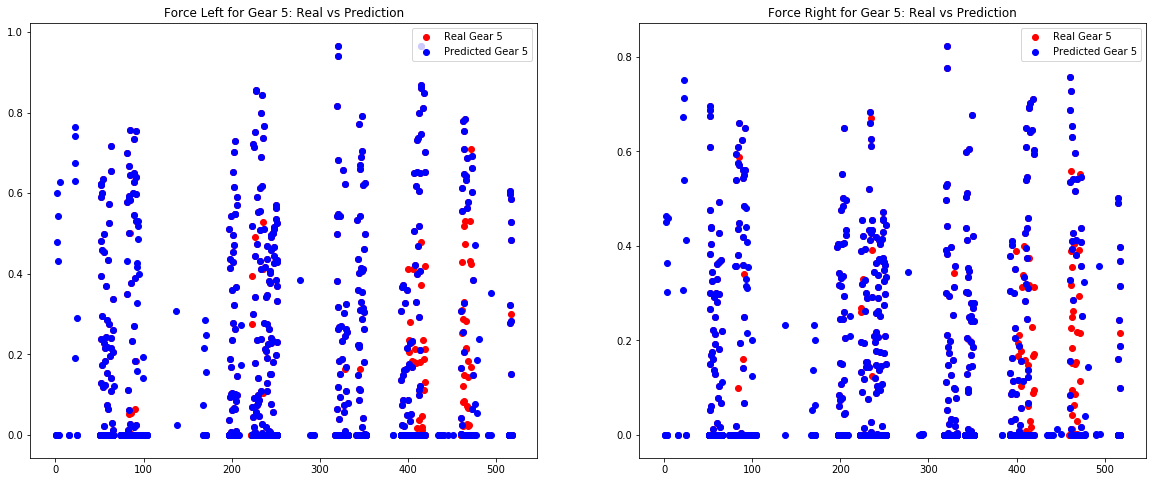

In [29]:
for i in range(2,6):
    classPredResult = result[result[:,3]==i]
    classRealResult = result[result[:,4]==i]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
    
    ax1.set_title('Force Left for Gear '+str(i) +': Real vs Prediction') 
    ax1.scatter(classRealResult[:,0],classRealResult[:,1],c ='red',label='Real Gear ' + str(i))
    ax1.scatter(classPredResult[:,0],classPredResult[:,1],c ='blue',label='Predicted Gear ' + str(i))
    ax1.legend(loc="upper right")
    
    ax2.set_title('Force Right for Gear '+str(i) +': Real vs Prediction') 
    ax2.scatter(classRealResult[:,0],classRealResult[:,2],c ='red',label='Real Gear ' + str(i))
    ax2.scatter(classPredResult[:,0],classPredResult[:,2],c ='blue',label='Predicted Gear ' + str(i))
    ax2.legend(loc="upper right")
plt.show()    

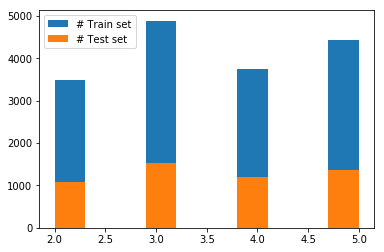

In [20]:
# Count of data for each gear in training set
i = (np.argmax(trainY, axis = 2)) + 2

# Count of data for each gear in test set
j = (np.argmax(testY, axis = 2)) + 2

plt.hist(i, label = '# Train set')
plt.hist(j, label = '# Test set')
plt.legend()
plt.show()